In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

from matplotlib.pyplot import rc_context
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.cm as cm

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
from cnmf import cNMF, load_df_from_npz
import harmonypy
sys.path.append('../../../Code/')
# from utils import TCAT

from sklearn import metrics
from utils import read_dataset_log
import harmonypy as hm
from sklearn.preprocessing import MinMaxScaler
#from adjustText import adjust_text
import math

from functools import reduce

from starcat import starCAT


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap_density = plt.cm.hsv
cmaplist = [cmap_density(i) for i in range(cmap_density.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap_density = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap_density.N)

In [5]:
from scipy.stats import fisher_exact

from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



import pickle

from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [7]:
figdir = '../../../Figures/Components'

In [8]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,scores_fn,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Activ...,...,

In [9]:
cgep_paths = read_dataset_log('cGEP Paths')


In [11]:
gep_info = read_dataset_log('cGEP_Name')
name_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [12]:
scores_spectra = pd.read_csv(cgep_paths['scores_spectra'][0], index_col = 0, sep = '\t')
scores_spectra.index = scores_spectra.index.map(name_map)

In [13]:
comp = {}

for dataset in params.index:

    usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
    meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
    
    if 'CTLA4/CD38' not in usage.columns:
        usage.columns = usage.columns.map(name_map)
        
    cat = starCAT(reference='TCAT.V1', cachedir='../../../Data/Misc/cache')
    cat.usage = usage
    cat.usage_norm = usage.div(usage.sum(axis=1), axis=0).copy()
    usage_norm = cat.usage_norm
    scores = cat.compute_addon_scores()
    
    comp_all = reduce(lambda l, r: pd.merge(l, r, left_index = True, right_index = True, how='inner'), 
                      [meta, scores, usage_norm])
    
    fn = params.loc[dataset, 'manual_gating_fn']
    if type(fn)==str:
        lineage_gating = pd.read_csv(fn, index_col = 0, sep = '\t')['0']
        lineage_gating = lineage_gating.rename('Gating')
        lineage_gating_class = pd.Series(np.nan, index = lineage_gating.index)
        lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'
        lineage_gating_class.loc[lineage_gating=='Treg'] = 'CD4 Treg'
        lineage_gating_class.loc[lineage_gating.str.contains('CD8')] = 'CD8 Conv'
        lineage_gating_class.loc[lineage_gating_class.isna()] = 'Other'
        lineage_gating_class.name = 'Gating_Class'
    
        comp_all = reduce(lambda l, r: pd.merge(l, r, left_index = True, right_index = True, how='inner'), 
                          [comp_all, lineage_gating, lineage_gating_class])
    
    fn = params.loc[dataset, 'manual_activation_gating_fn']
    if type(fn)==str:
        gating_act = pd.read_csv(fn, index_col = 0, sep = '\t')
        comp_all = reduce(lambda l, r: pd.merge(l, r, left_index = True, right_index = True, how='inner'), 
                          [comp_all, gating_act])

    comp[dataset] = comp_all

Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4 Conv' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'
/tmp/ipykernel_124700/2728905247.py:6: DtypeWarning: Columns (18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t

Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4 Conv' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4 Conv' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'
/tmp/ipykernel_124700/2728905247.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4 Conv' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'
/tmp/ipykernel_124700/2728905247.py:6: DtypeWarning: Columns (2,26) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')


Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_124700/2728905247.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4 Conv' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lineage_gating_class.loc[lineage_gating.str.contains('CD4')] = 'CD4 Conv'


In [14]:
gep_list = ['ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3', 'OX40/EBI3']


In [15]:
phenomap = {
    'COMBAT':{
        'phenocol':'Source',
        'mapping':{'COVID_SEV':'Covid-19', 'Sepsis':np.nan, 'COVID_MILD':'Covid-19', 'COVID_HCW_MILD':'Covid-19', 'HV':'Healthy',
                  'COVID_CRIT':'Covid-19', 'COVID_LDN':'Covid-19', 'Flu':np.nan},
        'allcols':['Source', 'TimeSinceOnset']
    },
    
    'UK-Covid':{
        'phenocol':'Status_on_day_collection_summary',
        'mapping':{'Moderate':'Covid-19', 'Mild':'Covid-19', 'Critical':'Covid-19', 'Severe':'Covid-19', 'Healthy':'Healthy', 'Asymptomatic':np.nan,
                  'Non_covid':np.nan, 'LPS_90mins':np.nan, 'LPS_10hours':np.nan},
        'allcols':['Status_on_day_collection_summary', 'Days_from_onset']
        
    },
    
    # 'Sparks':{
    #     'phenocol':'visit',
    #     'mapping':{'Day 0':'D0', 'Day 1':'D1', 'Day 28':'D28', np.nan:'Control'},
    #     'allcols':['visit', 'group', 'vaccine']
    # },
        
        
    # 'HIV-Vaccine':{
    #     'phenocol':'time',
    #     'mapping':{0:'Pre-Vaccine', 3:'Post-Vaccine', 7:'Post-Vaccine'},
    #     'allcols':['time'] 
        
    # },    

    
    'Pan-Cancer':{
        'phenocol':'loc',
        'mapping':{'T':'Tumor', 'N':'Normal'},
        'allcols':['loc', 'cancerType', 'meta.cluster'] 
        
    },    
    
    
}

In [16]:
lineage_geps = gep_info[gep_info['Class']=='Lineage']['Short_Name'].values

# Cancer comparison

## Cross-dataset comparison

In [18]:
multi_comp = pd.DataFrame()
for dataset in ['AMP-RA', 'Pan-Cancer', 'TBRU', 'HIV-Vaccine', 'UK-Covid', 'COMBAT', 'Pan-Tissue', 'Sparks']:
    print(dataset)
    dat = comp[dataset][list(usage.columns) + ['ASA',  'Multinomial_Label', 'Proliferation', 'ASA_binary',
                                               'Proliferation_binary', 
                                               params.loc[dataset, 'cluster_col'], params.loc[dataset, 'individual_col']
                                              ]].rename(
                    columns = {params.loc[dataset, 'cluster_col'] : 'cluster',
                              params.loc[dataset, 'individual_col'] : 'donor'})

    dat['Dataset'] = dataset
    if dataset in phenomap.keys():
        dat['Pheno'] = comp[dataset][phenomap[dataset]['phenocol']].map(phenomap[dataset]['mapping'])
    elif isinstance(params.loc[dataset, 'context_label'], str):
        dat['Pheno'] = params.loc[dataset, 'context_label'] 
    else:
        dat['Pheno'] = 'Healthy'


    dat = dat.reset_index(drop = True)

    multi_comp = pd.concat([multi_comp, dat], axis = 0)
    
multi_comp['Pheno_Renamed'] = multi_comp['Pheno'].replace({'Post-Vaccine+Healthy' : 'Healthy',
                           'Non-Cancer/Non-Viral' : 'Healthy', 
                            'Normal' : 'Healthy',
                            'Pre-Vaccine' : 'Healthy'})

AMP-RA
Pan-Cancer
TBRU
HIV-Vaccine
UK-Covid
COMBAT
Pan-Tissue
Sparks


In [741]:
multi_comp['Dataset'].unique()

array(['AMP-RA', 'Pan-Cancer', 'TBRU', 'HIV-Vaccine', 'UK-Covid',
       'COMBAT', 'Pan-Tissue', 'Sparks'], dtype=object)

In [36]:
from matplotlib.patches import Patch


In [19]:
test_vars = ['ASA'] + gep_list

In [20]:
pheno_cmap = {'Tumor': '#FF6F61',
              'Covid-19': '#81c380',
              'RA+OA': '#3CB9C6', 
              # 'Post-Vaccine': 'olivedrab',
 'Healthy': '#D3BFAE'}


In [21]:
test_vars = ['ASA'] + gep_list

In [22]:
ds_pheno_order = ['Pan-Cancer Tumor', 'AMP-RA RA+OA', 'COMBAT Covid-19', 'UK-Covid Covid-19',
                  # 'HIV-Vaccine Post-Vaccine',
                   'Pan-Cancer Healthy', 
                  'COMBAT Healthy', 'UK-Covid Healthy', 'Pan-Tissue Healthy', 'HIV-Vaccine Healthy',
                  'Sparks Healthy', 'TBRU Healthy']
       

In [24]:
dat_all = pd.DataFrame(multi_comp.groupby(['Dataset', 'donor', 'Pheno_Renamed'])[['ASA'] + list(usage.columns)].mean()).reset_index()
dat_all['Dataset_Pheno'] = dat_all['Dataset'] + ' ' + dat_all['Pheno_Renamed']


In [25]:
from scipy.stats import ranksums

In [188]:
for dsp in ds_pheno_order:
    print(dsp, dat_all[dat_all['Dataset_Pheno']==dsp][gep_list].sum(axis = 1).max())

Pan-Cancer Tumor 0.14465917412430634
AMP-RA RA+OA 0.07148592417459029
COMBAT Covid-19 0.07563299847806577
UK-Covid Covid-19 0.07844819956880125
Pan-Cancer Healthy 0.09938159276140755
COMBAT Healthy 0.02993637571960229
UK-Covid Healthy 0.05338993648527129
Pan-Tissue Healthy 0.06982209165778686
HIV-Vaccine Healthy 0.04306073334103014
Sparks Healthy 0.04948200449227252
TBRU Healthy 0.0640856106347184


In [26]:
res = pd.DataFrame()

p1 = 'Tumor'
dat1 = dat_all[dat_all['Pheno_Renamed']==p1]

for p2 in ['RA+OA', 'Covid-19', 'Healthy']:
    dat2 = dat_all[dat_all['Pheno_Renamed']==p2]

    for g in gep_list:
        t, pval = ttest_ind(dat1[g], dat2[g], equal_var = False)
        res = pd.concat([res, pd.DataFrame([p1, p2, g, t, pval], index = ['pheno1', 'pheno2', 'GEP', 't', 'pval']).T])

res = res.reset_index(drop = True)

res['padj'] = res['pval']*res.shape[0]

In [27]:
res

,pheno1,pheno2,GEP,t,pval,padj
0,Tumor,RA+OA,ICOS/CD38,-0.155283,0.876787,10.521445
1,Tumor,RA+OA,CTLA4/CD38,0.606718,0.544916,6.538996
2,Tumor,RA+OA,TIMD4/TIM3,4.736923,0.000005,0.000064
3,Tumor,RA+OA,OX40/EBI3,4.368282,0.000028,0.000338
4,Tumor,Covid-19,ICOS/CD38,3.393361,0.000891,0.010697
5,Tumor,Covid-19,CTLA4/CD38,3.493246,0.000685,0.008223
6,Tumor,Covid-19,TIMD4/TIM3,2.815758,0.005361,0.064329
7,Tumor,Covid-19,OX40/EBI3,5.481136,0.0,0.000004
8,Tumor,Healthy,ICOS/CD38,-0.467376,0.641057,7.692678
9,Tumor,Healthy,CTLA4/CD38,3.295487,0.001351,0.016214


In [28]:
res.loc[10, 'pval']

9.995776707797074e-15

In [29]:
res.loc[11, 'pval']

5.192413513828775e-09

In [30]:
res['label'] = 'ns'

res.loc[res['padj'] < 0.05, 'label'] = '*'
res.loc[res['padj'] < 0.01, 'label'] = '**'
res.loc[res['padj'] < 0.001, 'label'] = '***'

In [31]:
res_all = pd.DataFrame()

for i, p1 in enumerate(['Tumor', 'RA+OA', 'Covid-19', 'Healthy']):
    dat1 = dat_all[dat_all['Pheno_Renamed']==p1]

    for j, p2 in enumerate(['Tumor', 'RA+OA', 'Covid-19', 'Healthy']):
        dat2 = dat_all[dat_all['Pheno_Renamed']==p2]
        if j > i:
            for g in gep_list:
                t, pval = ttest_ind(dat1[g], dat2[g], equal_var = False)
                fc = dat1[g].mean()/dat2[g].mean()
                logfc = np.log2(fc)
                res_all = pd.concat([res_all, pd.DataFrame([p1, p2, g, t, fc, logfc, pval], 
                                                   index = ['pheno1', 'pheno2', 'GEP', 't', 'fc', 'log2fc', 'pval']).T])
res_all = res_all.reset_index(drop = True)
res_all['padj'] = res_all['pval']*res.shape[0]

            

In [32]:
res_all

,pheno1,pheno2,GEP,t,fc,log2fc,pval,padj
0,Tumor,RA+OA,ICOS/CD38,-0.155283,0.990071,-0.014396,0.876787,10.521445
1,Tumor,RA+OA,CTLA4/CD38,0.606718,1.040262,0.056946,0.544916,6.538996
2,Tumor,RA+OA,TIMD4/TIM3,4.736923,1.500045,0.585005,0.000005,0.000064
3,Tumor,RA+OA,OX40/EBI3,4.368282,1.710288,0.774239,0.000028,0.000338
4,Tumor,Covid-19,ICOS/CD38,3.393361,1.237488,0.307415,0.000891,0.010697
5,Tumor,Covid-19,CTLA4/CD38,3.493246,1.237986,0.307995,0.000685,0.008223
6,Tumor,Covid-19,TIMD4/TIM3,2.815758,1.287026,0.364041,0.005361,0.064329
7,Tumor,Covid-19,OX40/EBI3,5.481136,1.986552,0.990266,0.0,0.000004
8,Tumor,Healthy,ICOS/CD38,-0.467376,0.975505,-0.035779,0.641057,7.692678
9,Tumor,Healthy,CTLA4/CD38,3.295487,1.215172,0.28116,0.001351,0.016214


In [33]:
res_all['label'] = 'ns'

res_all.loc[res_all['padj'] < 0.05, 'label'] = '*'
res_all.loc[res_all['padj'] < 0.01, 'label'] = '**'
res_all.loc[res_all['padj'] < 0.001, 'label'] = '***'

In [965]:
res_all[res_all['label']!='ns'].sort_values(['GEP', 't'])

,pheno1,pheno2,GEP,t,pval,padj,label
9,Tumor,Healthy,CTLA4/CD38,3.295487,0.001351,0.016214,*
17,RA+OA,Healthy,CTLA4/CD38,3.456468,0.00079,0.00948,**
5,Tumor,Covid-19,CTLA4/CD38,3.493246,0.000685,0.008223,**
13,RA+OA,Covid-19,CTLA4/CD38,3.676597,0.000353,0.004238,**
20,Covid-19,Healthy,ICOS/CD38,-6.199021,0.0,0.0,***
4,Tumor,Covid-19,ICOS/CD38,3.393361,0.000891,0.010697,*
12,RA+OA,Covid-19,ICOS/CD38,4.030938,0.000088,0.001054,**
3,Tumor,RA+OA,OX40/EBI3,4.368282,0.000028,0.000338,***
23,Covid-19,Healthy,OX40/EBI3,4.410123,0.000015,0.000184,***
19,RA+OA,Healthy,OX40/EBI3,4.7649,0.000007,0.000085,***


In [34]:
test_vars = ['OX40/EBI3', 'ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3']

/tmp/ipykernel_124700/1794660697.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '')
/tmp/ipykernel_124700/1794660697.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '')
/tmp/ipykernel_124700/1794660697.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '')
/tmp/ipykernel_124700/1794660697.py:34: UserWarning: set_t

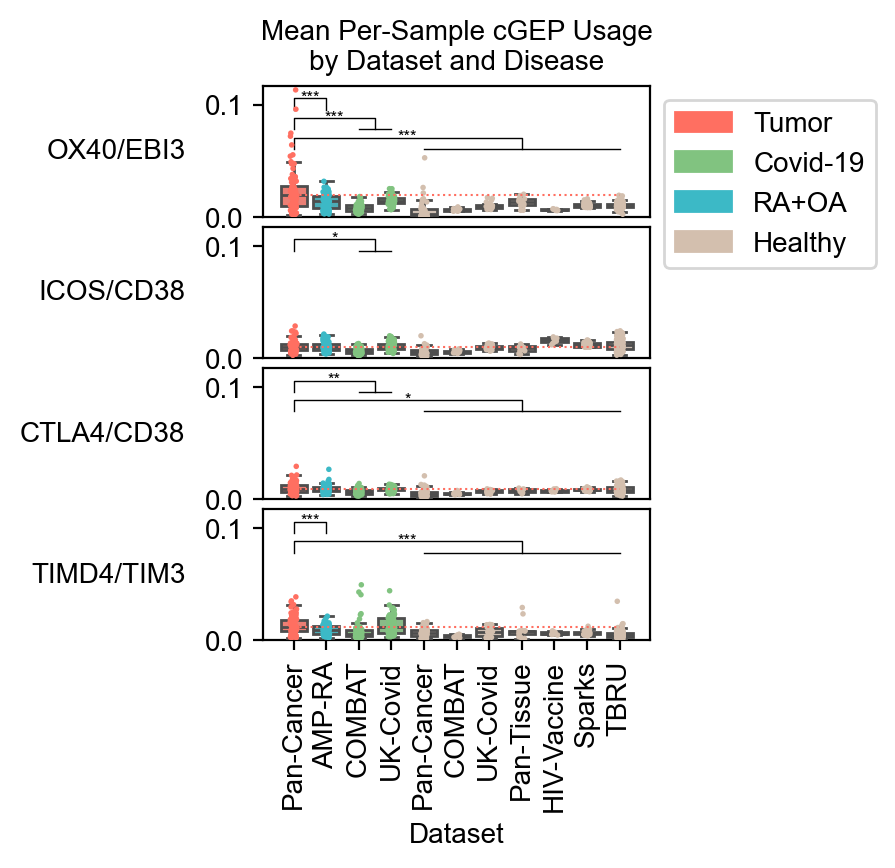

In [40]:
# Create a custom legend using Matplotlib's Patch
custom_legend = [Patch(color=color, label=label) for label, color in pheno_cmap.items()]

fig, axes = plt.subplots(dpi = 200, figsize = (2.5, .9*len(test_vars)), 
                         ncols = 1,#len(multi_comp['Dataset'].unique()),
                         nrows = len(test_vars),
                         gridspec_kw = {'hspace': 0.075}
                    )

dat_all = pd.DataFrame(multi_comp.groupby(['Dataset', 'donor', 'Pheno_Renamed'])[['ASA'] + list(usage.columns)].mean()).reset_index()
dat_all['Dataset_Pheno'] = dat_all['Dataset'] + ' ' + dat_all['Pheno_Renamed']
# ylims = (0, dat_all['ASA'].max()*1.3)
ylims = (0, dat_all[test_vars].unstack().max()*1.03)

for i, g in enumerate(test_vars):

    ax = axes[i]

    dat = dat_all #dat_all[dat_all['Dataset']==dataset]
    sns.boxplot(y = dat[g], hue = dat['Pheno_Renamed'], x = dat['Dataset_Pheno'], showfliers=False, ax = ax,
               palette = pheno_cmap, legend = False, order = ds_pheno_order, zorder = 7,
               )
    sns.stripplot(y = dat[g], hue = dat['Pheno_Renamed'], x = dat['Dataset_Pheno'], size = 2,legend = False, 
                  ax = ax, palette = pheno_cmap, order = ds_pheno_order, zorder = 8,
                  # dodge = True
                 )
    ax.tick_params('x', rotation = 90)
    ylabel = ax.set_ylabel(g, rotation=0, labelpad=7)
    ylabel.set_horizontalalignment('right')
    ylabel.set_verticalalignment('center')
   # ax.tick_params('y', labelrotation = 0)
    
    ax.set_xlabel('Dataset')
    ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '') 
                        for d in ds_pheno_order])
    
    if i!= len(test_vars)-1:
        ax.set_xticks([])
        ax.set_xlabel('')
    ax.set_ylim(ylims)

    ax.hlines(xmin = 0, xmax =10, y = dat[dat['Dataset_Pheno']=='Pan-Cancer Tumor'][g].median(), linewidth = 0.75,
             color = pheno_cmap['Tumor'], zorder = 8, linestyle = 'dotted')

    # plot significance bars
    if g in gep_list:

        n = 1
        y_scalar = 1.2
        p2 = 'RA+OA'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.004, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

        n = 2.5
        p2 = 'Covid-19'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.plot([2, 3], [y, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.004, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

        n = 7
        p2 = 'Healthy'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.plot([4, 10], [y, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.004, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

    
    if (i ==0):
        ax.legend(handles=custom_legend,bbox_to_anchor=(1, 1), title='')
        ax.set_title('Mean Per-Sample cGEP Usage\nby Dataset and Disease', fontsize = label_fontsize)
plt.savefig(os.path.join(figdir, 'Revision_ActGEPsbyDatasetDisease.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_ActGEPsbyDatasetDisease.pdf'), bbox_inches="tight")

In [966]:
test_vars = ['OX40/EBI3',]

/tmp/402154.tmpdir/ipykernel_207875/2664992774.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '')


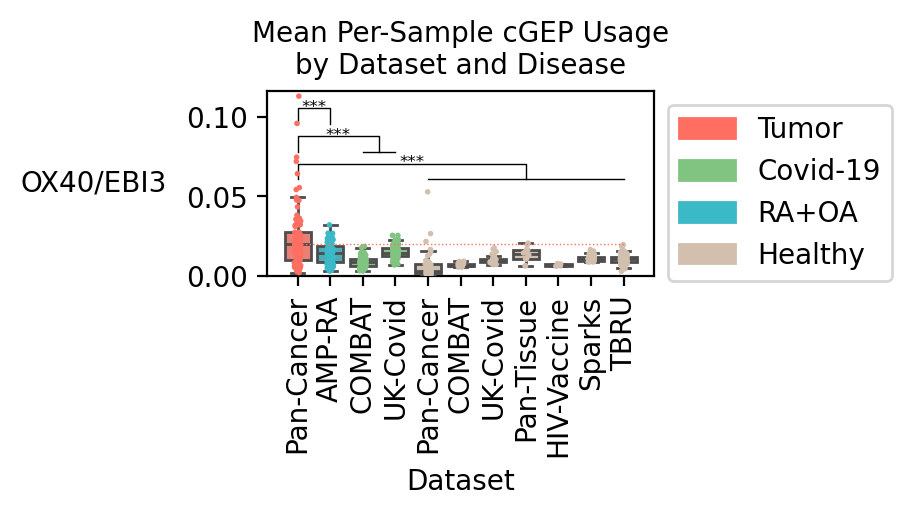

In [987]:
# Create a custom legend using Matplotlib's Patch
custom_legend = [Patch(color=color, label=label) for label, color in pheno_cmap.items()]

fig, axes = plt.subplots(dpi = 200, figsize = (2.5, 1.2*len(test_vars)), 
                         ncols = 1,#len(multi_comp['Dataset'].unique()),
                         nrows = len(test_vars),
                         gridspec_kw = {'hspace': 0.075}
                    )

dat_all = pd.DataFrame(multi_comp.groupby(['Dataset', 'donor', 'Pheno_Renamed'])[['ASA'] + list(usage.columns)].mean()).reset_index()
dat_all['Dataset_Pheno'] = dat_all['Dataset'] + ' ' + dat_all['Pheno_Renamed']
# ylims = (0, dat_all['ASA'].max()*1.3)
ylims = (0, dat_all[test_vars].unstack().max()*1.03)

for i, g in enumerate(test_vars):

    ax = axes

    dat = dat_all #dat_all[dat_all['Dataset']==dataset]
    sns.boxplot(y = dat[g], hue = dat['Pheno_Renamed'], x = dat['Dataset_Pheno'], showfliers=False, ax = ax,
               palette = pheno_cmap, legend = False, order = ds_pheno_order, zorder = 7,
               )
    sns.stripplot(y = dat[g], hue = dat['Pheno_Renamed'], x = dat['Dataset_Pheno'], size = 2,legend = False, 
                  ax = ax, palette = pheno_cmap, order = ds_pheno_order, zorder = 8,
                  # dodge = True
                 )
    ax.tick_params('x', rotation = 90)
    ylabel = ax.set_ylabel(g, rotation=0, labelpad=7)
    ylabel.set_horizontalalignment('right')
    ylabel.set_verticalalignment('center')
   # ax.tick_params('y', labelrotation = 0)
    
    ax.set_xlabel('Dataset')
    ax.set_xticklabels([d.replace(' Tumor', '').replace(' Covid-19', '').replace(' RA+OA', '').replace(' Healthy', '').replace(' Post-Vaccine', '') 
                        for d in ds_pheno_order])
    
    if i!= len(test_vars)-1:
        ax.set_xticks([])
        ax.set_xlabel('')
    ax.set_ylim(ylims)

    
    ax.hlines(xmin = 0, xmax =10, y = dat[dat['Dataset_Pheno']=='Pan-Cancer Tumor'][g].median(), linewidth = 0.5,
             color = pheno_cmap['Tumor'], zorder = 8, linestyle = 'dotted')


    # plot significance bars
    if g in gep_list:

        n = 1
        y_scalar = 1.2
        p2 = 'RA+OA'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.006, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

        n = 2.5
        p2 = 'Covid-19'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.plot([2, 3], [y, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.006, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

        n = 7
        p2 = 'Healthy'
        x1, x2 = 0, n 
        label = res.loc[(res['pheno2']==p2) & (res['GEP']==g), 'label'].values[0]
        if label != 'ns':
            y = ylims[1]*(1-(.15)*y_scalar) 
            ax.plot([x1, x1, x2, x2], [y, y + 0.01, y+0.01, y], lw=.5, color='black', zorder = 3)
            ax.plot([4, 10], [y, y], lw=.5, color='black', zorder = 3)
            ax.text((x1 + x2) / 2, y+0.006, label, ha='center', va='bottom', size = 6, color='black')
            y_scalar+=1

    
    if (i ==0):
        ax.legend(handles=custom_legend,bbox_to_anchor=(1, 1), title='')
        ax.set_title('Mean Per-Sample cGEP Usage\nby Dataset and Disease', fontsize = label_fontsize)
plt.savefig(os.path.join(figdir, 'Revision_OX40GEPbyDatasetDisease.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_OX40GEPbyDatasetDisease.pdf'), bbox_inches="tight")

## Top activation + other genes

In [41]:
dat_all = pd.DataFrame(multi_comp.groupby(['Dataset', 'donor'])[['ASA'] + list(usage.columns)].mean()).reset_index()

In [42]:
test_vars

['OX40/EBI3', 'ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3']

In [43]:
test_vars = ['OX40/EBI3', 'ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3'] + ['Tph', 'Tfh-1', 'Tfh-2',]

In [44]:
scores_overlap = scores_spectra.loc[test_vars, :].dropna(axis = 1)

In [45]:
list(scores_overlap.loc['OX40/EBI3', ].sort_values(ascending = False).index).index('CXCL13')

71

In [46]:
markers_plot = []
for g in test_vars:
    print(g)
    print(scores_overlap.loc[g, :].sort_values(ascending = False).head(5).index)
    print(scores_overlap.loc[g, :].sort_values(ascending = False).head(3).index)
    markers_plot += scores_overlap.loc[g, :].sort_values(ascending = False).head(3).index.tolist()
    print()

OX40/EBI3
Index(['EBI3', 'TNFRSF4', 'TNFRSF18', 'PKM', 'PTP4A3'], dtype='object')
Index(['EBI3', 'TNFRSF4', 'TNFRSF18'], dtype='object')

ICOS/CD38
Index(['ACTG1', 'GAPDH', 'MXD4', 'NEAT1', 'GBP2'], dtype='object')
Index(['ACTG1', 'GAPDH', 'MXD4'], dtype='object')

CTLA4/CD38
Index(['LGMN', 'CD59', 'LAG3', 'POU2AF1', 'RASGRP4'], dtype='object')
Index(['LGMN', 'CD59', 'LAG3'], dtype='object')

TIMD4/TIM3
Index(['TIMD4', 'HAVCR2', 'GZMB', 'LIM2', 'GZMA'], dtype='object')
Index(['TIMD4', 'HAVCR2', 'GZMB'], dtype='object')

Tph
Index(['LAG3', 'LAIR2', 'SLC27A2', 'PDCD1', 'CD4'], dtype='object')
Index(['LAG3', 'LAIR2', 'SLC27A2'], dtype='object')

Tfh-1
Index(['TOX2', 'SMCO4', 'KSR2', 'PEG10', 'CXCR5'], dtype='object')
Index(['TOX2', 'SMCO4', 'KSR2'], dtype='object')

Tfh-2
Index(['CD200', 'GNG4', 'NMB', 'CXCL13', 'ICA1'], dtype='object')
Index(['CD200', 'GNG4', 'NMB'], dtype='object')



In [814]:
markers_plot

['EBI3',
 'TNFRSF4',
 'TNFRSF18',
 'ACTG1',
 'GAPDH',
 'MXD4',
 'LGMN',
 'CD59',
 'LAG3',
 'TIMD4',
 'HAVCR2',
 'GZMB',
 'LAG3',
 'LAIR2',
 'SLC27A2',
 'TOX2',
 'SMCO4',
 'KSR2',
 'CD200',
 'GNG4',
 'NMB']

In [47]:
markers_plot = ['EBI3',
 'TNFRSF4',
 'TNFRSF18',
 'ACTG1',
 'GAPDH',
 'MXD4',
 'LGMN',
 'CD59',
 'POU2AF1',# 'LAG3',
 'TIMD4',
 'HAVCR2',
 'GZMB',
'PDCD1', # 'LAG3',
 'LAIR2',
 'SLC27A2',
 'TOX2',
 'SMCO4',
 'KSR2',
 'CD200',
 'GNG4',
 'NMB']



In [248]:
# markers_plot += ['CXCL13']

In [48]:
# markers_plot_unique = [x for x in markers_plot if markers_plot.count(x) == 1]
# markers_plot_shared = sorted(set([x for x in markers_plot if markers_plot.count(x) > 1]))

markers_plot_unique = [x for x in markers_plot if markers_plot.count(x) == 1 and x!= 'CXCL13']
markers_plot_shared = ['CXCL13'] + sorted(set([x for x in markers_plot if markers_plot.count(x) > 1]))

In [49]:
'CXCL13' in markers_plot_unique, 'CXCL13' in markers_plot_shared

(False, True)

In [824]:
len(test_vars)

7

In [50]:
from matplotlib.colors import LinearSegmentedColormap


hmap_cmap = LinearSegmentedColormap.from_list('custom', ['whitesmoke', '#a9cae9', '#9b7cb9'])


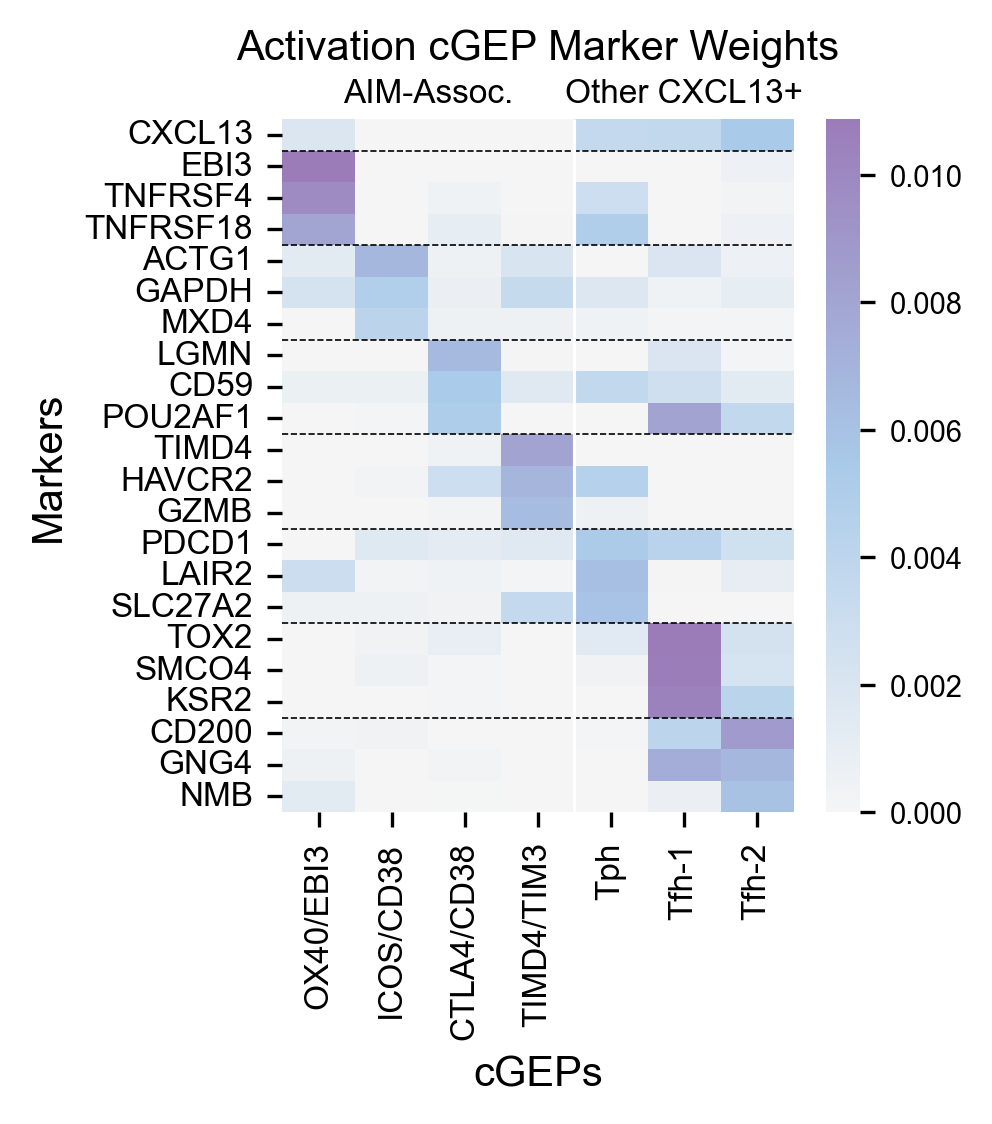

In [54]:
dat = scores_overlap.loc[test_vars, markers_plot_shared + markers_plot_unique]

vmin = 0
vmax = dat.unstack().quantile(.99)
fig, ax = plt.subplots(dpi = 300, figsize = (2.75, 3))
sns.heatmap(dat.T, cmap = hmap_cmap, vmin = vmin, vmax = vmax, ax = ax)
ax.set_yticks(np.arange(0 + .5, len(markers_plot_shared +markers_plot_unique) + .5),
             markers_plot_shared+markers_plot_unique)
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xlabel('cGEPs', fontsize = label_fontsize)
ax.set_ylabel('Markers', fontsize = label_fontsize)
ax.set_title('Activation cGEP Marker Weights', fontsize = label_fontsize, y = 1.05)
ax.text(x = 2/7, y = 1.025, s = 'AIM-Assoc.', transform=ax.transAxes, ha = 'center', fontsize= tick_fontsize)
ax.text(x = 5.5/7, y = 1.025, s = 'Other CXCL13+', transform=ax.transAxes, ha = 'center', fontsize= tick_fontsize)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=tick_fontsize-1)

ax.hlines(xmin = 0, xmax = 8, y = 1, color = 'black', linewidth = .4, linestyle = 'dashed')
for i in range(0, len(test_vars)-1):
    ax.hlines(xmin = 0, xmax = 8, y = 4 +3*i, color = 'black', linewidth = .4, linestyle = 'dashed')
ax.vlines(ymin = 0, ymax = 25, x = 4, color = 'white', linewidth = .75)
plt.savefig(os.path.join(figdir, 'Revision_Heatmap_ActGEPs_TopMarkers.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_Heatmap_ActGEPs_TopMarkers.pdf'), bbox_inches="tight")
plt.show()


In [70]:
test_vars = ['OX40/EBI3', 'ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3',
            'Multi-Cytokine', 'NME1/FABP5', 'RGCC/MYADM', 'BCL2/FAM13A'] + ['Tph', 'Tfh-1', 'Tfh-2',]

In [71]:
scores_overlap = scores_spectra.loc[test_vars, :].dropna(axis = 1)

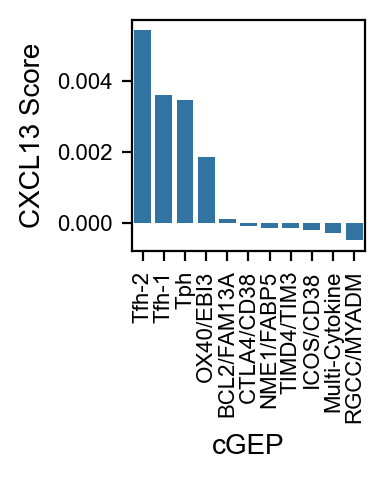

In [73]:
fig, ax = plt.subplots(dpi = 200, figsize = (1.5, 1.5))
sns.barplot(scores_overlap['CXCL13'].sort_values(ascending = False))
ax.set_ylabel('CXCL13 Score', fontsize = label_fontsize)
ax.set_xlabel('cGEP', fontsize = label_fontsize)
ax.tick_params('x', rotation = 90)
ax.tick_params('both', labelsize = tick_fontsize)
plt.savefig(os.path.join(figdir, 'Revision_CXCL13byGEP.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_CXCL13byGEP.pdf'), bbox_inches="tight")


# Covid-19 comparison

In [75]:
ds1 = 'COMBAT'
dataset = ds1

ds2 = 'UK-Covid'
dataset = ds2

In [76]:
test_vars = ['ASA', 'Exhaustion', 'Poor-Quality', 'Mito', 'ISG'] + gep_list

In [77]:
comp[ds1]['Pheno'] = comp[ds1][phenomap[ds1]['phenocol']].map(phenomap[ds1]['mapping'])
comp[ds2]['Pheno'] = comp[ds2][phenomap[ds2]['phenocol']].map(phenomap[ds2]['mapping'])

In [78]:
comp[ds1]['Age_interval_lower'] = comp[ds1]['Age'].astype('int')*10
comp[ds2]['Age_interval_lower'] = comp[ds2]['Age_interval'].str.replace('(', '').str.split(',', n=1).str[0].astype('int')

In [79]:
dat1 = comp[ds1][list(usage.columns) + ['ASA',  'Multinomial_Label', 'Proliferation', 'ASA_binary', 'Proliferation_binary', 
                                        
                                        'Gating', 'Gating_Class', 'Institute', 'COMBAT_ID', 'Pheno',
                                       'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial',
                                       'Age_interval_lower']].reset_index(drop = True).rename(
                columns = {'Institute' : 'Site', 'COMBAT_ID' : 'patient', 
                          'QC_ngenes' : 'ngenes', 'QC_total_UMI' : 'nUMI', 'QC_pct_mitochondrial' : 'pct_mito'})

dat2 = comp[ds2][list(usage.columns) + ['ASA',  'Multinomial_Label',  'Proliferation', 'ASA_binary', 'Proliferation_binary', 
                                        'Gating', 'Gating_Class', 'Site', 'patient_id', 'Pheno',
                                       'n_genes', 'total_counts', 'pct_counts_mt',
                                       'Age_interval_lower']].reset_index(drop = True).rename(
                columns = {'patient_id' : 'patient',  
                           'n_genes' : 'ngenes', 'total_counts' : 'nUMI', 'pct_counts_mt' : 'pct_mito'})

multi_comp = pd.concat([dat1, dat2],
                       keys = [ds1, ds2],
                      axis = 0)

multi_comp= multi_comp.reset_index(level = 0, names = 'Dataset')
multi_comp['Dataset_Site'] = multi_comp['Dataset'] + '_' + multi_comp['Site']

multi_comp['MaxLineage'] = multi_comp[lineage_geps].replace(0, np.nan).idxmax(axis=1)

In [80]:
gep_thresh = 0.0625
multi_comp['Poor-Quality_binary'] = multi_comp['Poor-Quality']> gep_thresh

## Top activation genes

In [330]:
test_vars

['ASA',
 'Exhaustion',
 'Poor-Quality',
 'Mito',
 'ISG',
 'ICOS/CD38',
 'CTLA4/CD38',
 'TIMD4/TIM3',
 'OX40/EBI3']

In [31]:
test_vars = gep_list

In [180]:
dataset = ds1
cnmf_obj = cNMF(output_dir=params.loc[dataset, 'cnmf_dir'], name=params.loc[dataset, 'name'])
hvg_fn = cnmf_obj.paths['nmf_genes_list']
hvgs = open(hvg_fn).read().rstrip().split('\n')
hvgs_ds1 = hvgs

In [181]:
dataset = ds2
cnmf_obj = cNMF(output_dir=params.loc[dataset, 'cnmf_dir'], name=params.loc[dataset, 'name'])
hvg_fn = cnmf_obj.paths['nmf_genes_list']
hvgs = open(hvg_fn).read().rstrip().split('\n')
hvgs_ds2 = hvgs

In [179]:
len(hvgs_ds1), len(hvgs_ds2)

(2000, 2000)

In [36]:
test_vars

['ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3', 'OX40/EBI3']

In [187]:
topgene_thresh = [20, 50, 100, 300, 500]

In [188]:
overlap_counts = pd.DataFrame()

for n_top_genes in topgene_thresh:
    top_genes = []
    for gep in scores_spectra.T.columns:
        top_genes.append(list(scores_spectra.T.sort_values(by=gep, ascending=False).index[:n_top_genes]))
    
    top_genes = pd.DataFrame(top_genes, index=scores_spectra.T.columns).T
    
    counts = pd.DataFrame([top_genes[test_vars].isin(hvgs_ds1).sum(), top_genes[test_vars].isin(hvgs_ds2).sum()],
                index = [ds1, ds2]).T
    counts['Num_TopGenes'] = n_top_genes
    overlap_counts = pd.concat([overlap_counts, counts])

overlap_counts = overlap_counts.reset_index(names = ['GEP'])

Text(0.5, 1.2, 'cGEP Overlap Between HVGs and Top Genes')

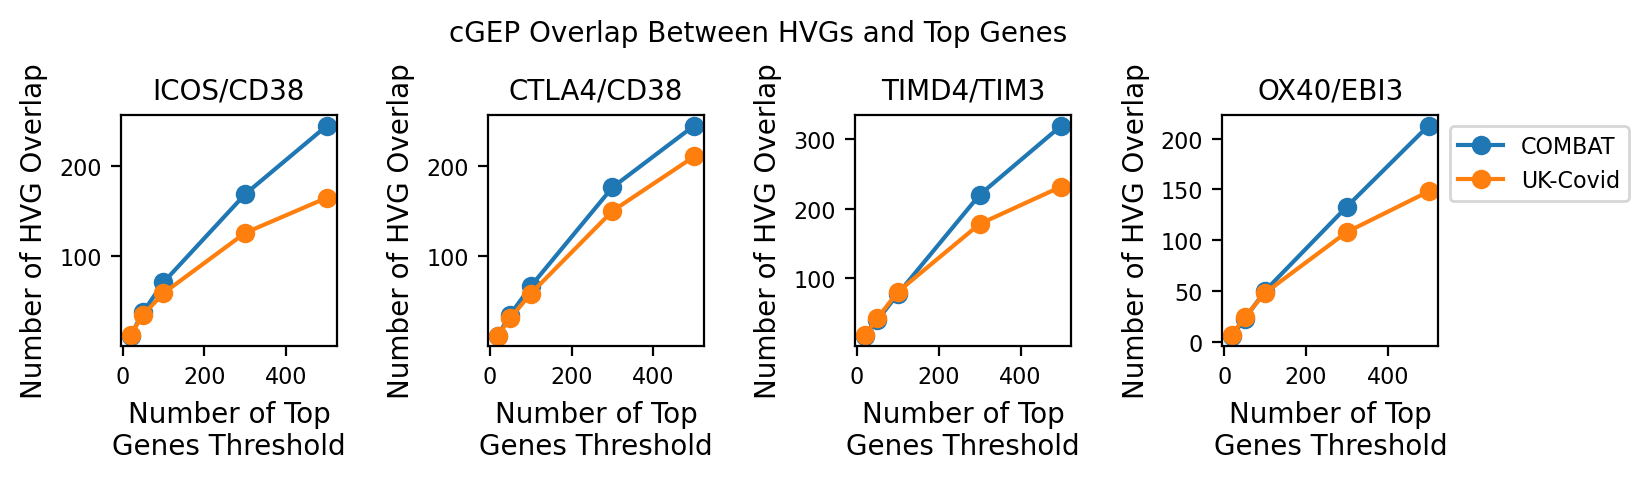

In [65]:
fig, axes = plt.subplots(dpi = 200, figsize = (8.5, 1.5), ncols = len(test_vars), gridspec_kw = {'wspace' : 0.7})

for n, gep in enumerate(test_vars):
    ax = axes[n]
    dat_gep = overlap_counts[overlap_counts['GEP']==gep]
    ax.plot(dat_gep['Num_TopGenes'], dat_gep[ds1], '-o', label = ds1)
    ax.plot(dat_gep['Num_TopGenes'], dat_gep[ds2], '-o', label = ds2)

    ax.tick_params('both', labelsize = tick_fontsize)
    ax.set_xlabel('Number of Top\nGenes Threshold', fontsize =label_fontsize)
    ax.set_ylabel('Number of HVG Overlap', fontsize =label_fontsize)
    ax.set_title(gep, fontsize =label_fontsize)
ax.legend(bbox_to_anchor = (1, 1), fontsize = tick_fontsize)
plt.suptitle('cGEP Overlap Between HVGs and Top Genes', y = 1.2, fontsize = label_fontsize)


In [216]:
n_top_genes = 50

top_genes = []
for gep in scores_spectra.T.columns:
    top_genes.append(list(scores_spectra.T.sort_values(by=gep, ascending=False).index[:n_top_genes]))

top_genes = pd.DataFrame(top_genes, index=scores_spectra.T.columns).T

## Cross-dataset, cross-lineage plots

In [82]:
site_cmap = {'COMBAT_Oxford': 'firebrick',
 'COMBAT_St_Georges': 'lightcoral',
 'UK-Covid_Sanger': 'darkblue',
 'UK-Covid_Cambridge': 'royalblue',
 'UK-Covid_Ncl': 'steelblue'}


In [436]:
multi_comp.columns

Index(['Dataset', 'CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito',
       'Doublet-RBC', 'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet',
       'NME1/FABP5', 'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton',
       'Heatshock', 'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid',
       'Metallothionein', 'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive',
       'Treg', 'Th17-Resting', 'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM',
       'TIMD4/TIM3', 'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19',
       'Th2-Activated', 'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell',
       'Th1-Like', 'CTLA4/CD38', 'CD8-Trm', 'Th17-Activated', 'Tfh-2',
       'OX40/EBI3', 'CD172a/MERTK', 'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2',
       'CD40LG/TXNIP', 'Tph', 'Exhaustion', 'Tfh-1', 'ASA',
       'Multinomial_Label', 'Proliferation', 'ASA_binary',
       'Proliferation_binary', 'Gating', 'Gating_Class', 'Site', 'patient',
       'Pheno', 'ngenes', 'nUMI', 'pct_mito', 'Age_interval_lower',
       'Da

In [441]:
test_vars

['ASA',
 'Exhaustion',
 'Poor-Quality',
 'Mito',
 'ISG',
 'ICOS/CD38',
 'CTLA4/CD38',
 'TIMD4/TIM3',
 'OX40/EBI3']

In [459]:
gep_list

['ICOS/CD38', 'CTLA4/CD38', 'TIMD4/TIM3', 'OX40/EBI3']

In [83]:
cc_cgeps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']

In [84]:
test_vars = ['ASA',
 'Exhaustion',
 'Poor-Quality',
 'Mito',
 'ISG', 
    'IEG', 'IEG2', 'IEG3', 'Proliferation', 'nUMI', 'ngenes'
            ] + cc_cgeps+ gep_list

In [85]:
test_vars = ['Poor-Quality', 'Mito', 'ISG']

In [86]:
test_vars = [ 'Poor-Quality',
 'Mito',
 'ISG',
 'CellCycle-G2M',
 'CellCycle-S',
 'CellCycle-Late-S']

In [87]:
test_vars = [ 'Poor-Quality',
 'Mito',

    'nUMI',
 'ngenes',
 # 'ISG',
            ]

In [88]:
varname_map = {'nUMI' : 'Num. UMI', 'ngenes' : 'Num. Genes'}
varname_map.update({g : g for g in test_vars if g not in varname_map.keys()})

In [89]:
varname_map

{'nUMI': 'Num. UMI',
 'ngenes': 'Num. Genes',
 'Poor-Quality': 'Poor-Quality',
 'Mito': 'Mito'}

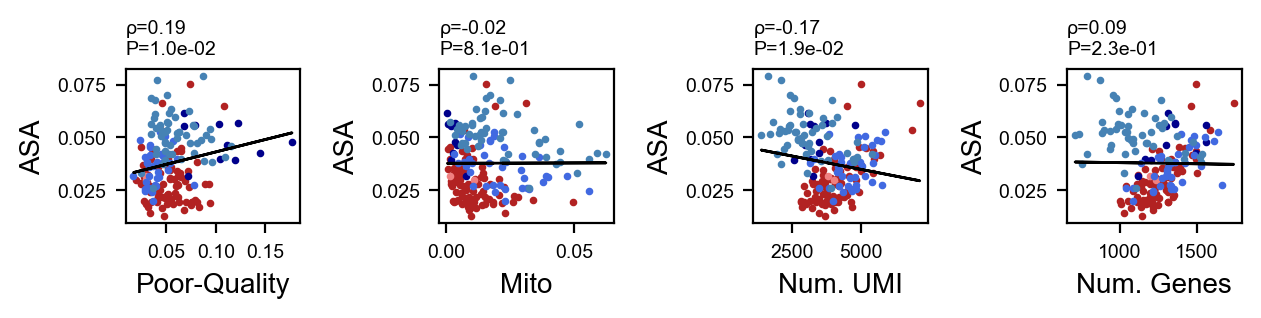

In [90]:
dat_all = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'Gating_Class', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()

for gate in ['All']: #['All'] + list(dat_all['Gating_Class'].unique()):
    if gate =='All':
        dat = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()
    else:
        dat = dat_all[(dat_all['Gating_Class']==gate)]
    
    fig, axes = plt.subplots(dpi = 200, figsize = (9/5*len(test_vars), 1.), 
                             ncols = len(test_vars), 
                             # nrows = 2, 
                             gridspec_kw = {'wspace' : 0.8})

    for n, g in enumerate(test_vars):
        ax = axes[n]
        
    
        for site in dat['Dataset_Site'].unique():
            ind = dat[dat['Dataset_Site']==site].index
            y = dat.loc[ind, 'ASA']
            x = dat.loc[ind, g]
            ax.scatter(x, y, s = 3, label = site, color = site_cmap[site])
            
        y_all = dat.loc[:, 'ASA']
        x_all = dat.loc[:, g]
        r_p, p_p = spearmanr(x_all, y_all)


        # fitting a linear regression line
        m, b = np.polyfit(x_all, y_all, 1)
        ax.plot(x_all, m*x_all + b, linewidth = 1, color = 'black')   
        
        ax.text(x = 0, y = 1.1, transform=ax.transAxes, s = f'ρ={r_p:.2f}\nP={p_p:.1e}',
               fontsize = tick_fontsize-1)

        ax.tick_params('both', labelsize = tick_fontsize -1)
        ax.set_ylabel('ASA', fontsize = label_fontsize)
        ax.set_xlabel(varname_map[g], fontsize = label_fontsize)

        if g in cc_cgeps:
            ax.set_xticklabels([f'{float(tick.get_text().replace("−", "-")):.0E}' 
                                for tick in ax.get_yticklabels()])
            # ax.set_xlabel(ax.get_xlabel(), labelpad=-1)

    # ax.legend()
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles, labels=[x.replace('_', ': ') for x in labels],
    #          bbox_to_anchor=(-.5, -.5), title = 'Dataset + Site', title_fontsize = tick_fontsize,
    #           fontsize = tick_fontsize, ncols = 2)
            
    # plt.suptitle(gate)
plt.savefig(os.path.join(figdir, 'Revision_Activation+GEPScatterplots_Covid.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_Activation+GEPScatterplots_Covid.pdf'), bbox_inches="tight")
plt.show()


All


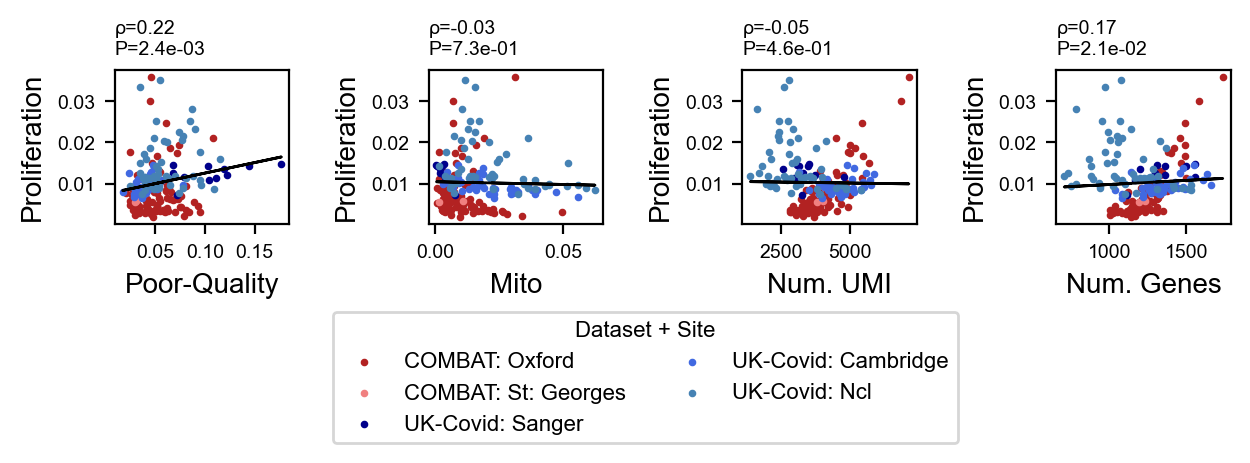

In [91]:
dat_all = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'Gating_Class', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'Proliferation', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()

for gate in ['All']: #['All'] + list(dat_all['Gating_Class'].unique()):
    print(gate)
    if gate =='All':
        dat = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'Proliferation', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()
    else:
        dat = dat_all[(dat_all['Gating_Class']==gate)]
    
    fig, axes = plt.subplots(dpi = 200, figsize = (9/5*len(test_vars), 1.), 
                             ncols = len(test_vars), 
                             # nrows = 2, 
                             gridspec_kw = {'wspace' : 0.8})

    for n, g in enumerate(test_vars):
        ax = axes[n]
        
    
        for site in dat['Dataset_Site'].unique():
            ind = dat[dat['Dataset_Site']==site].index
            y = dat.loc[ind, 'Proliferation']
            x = dat.loc[ind, g]
            ax.scatter(x, y, s = 3, label = site, color = site_cmap[site])
            
        y_all = dat.loc[:, 'Proliferation']
        x_all = dat.loc[:, g]
        r_p, p_p = spearmanr(x_all, y_all)


        # fitting a linear regression line
        m, b = np.polyfit(x_all, y_all, 1)
        ax.plot(x_all, m*x_all + b, linewidth = 1, color = 'black')   
        
        ax.text(x = 0, y = 1.1, transform=ax.transAxes, s = f'ρ={r_p:.2f}\nP={p_p:.1e}',
               fontsize = tick_fontsize-1)

        ax.tick_params('both', labelsize = tick_fontsize -1)
        ax.set_ylabel('Proliferation', fontsize = label_fontsize)
        ax.set_xlabel(varname_map[g], fontsize = label_fontsize)

        if g in cc_cgeps:
            ax.set_xticklabels([f'{float(tick.get_text().replace("−", "-")):.0E}' 
                                for tick in ax.get_yticklabels()])
            # ax.set_xlabel(ax.get_xlabel(), labelpad=-1)

    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=[x.replace('_', ': ') for x in labels],
             bbox_to_anchor=(-.5, -.5), title = 'Dataset + Site', title_fontsize = tick_fontsize,
              fontsize = tick_fontsize, ncols = 2)
            
    # plt.suptitle(gate)
plt.savefig(os.path.join(figdir, 'Revision_ProliferationGEPScatterplots_Covid.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Revision_ProliferationGEPScatterplots_Covid.pdf'), bbox_inches="tight")
plt.show()


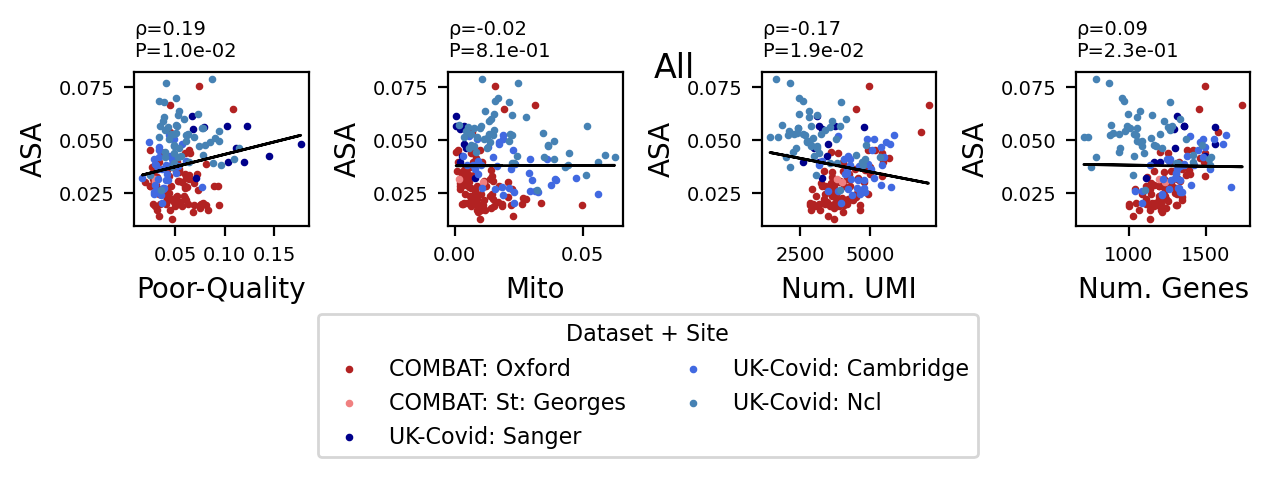

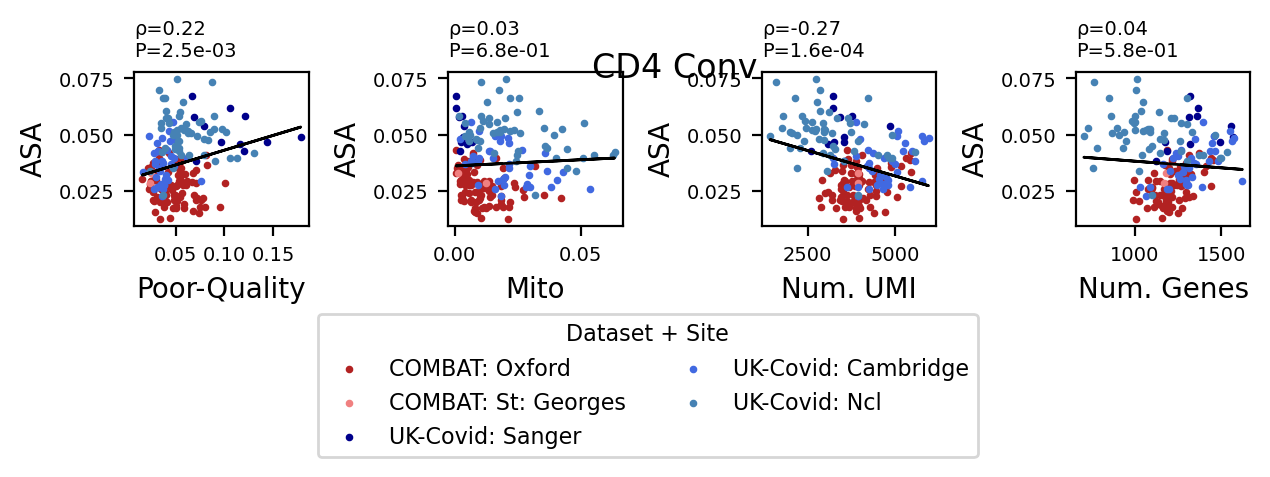

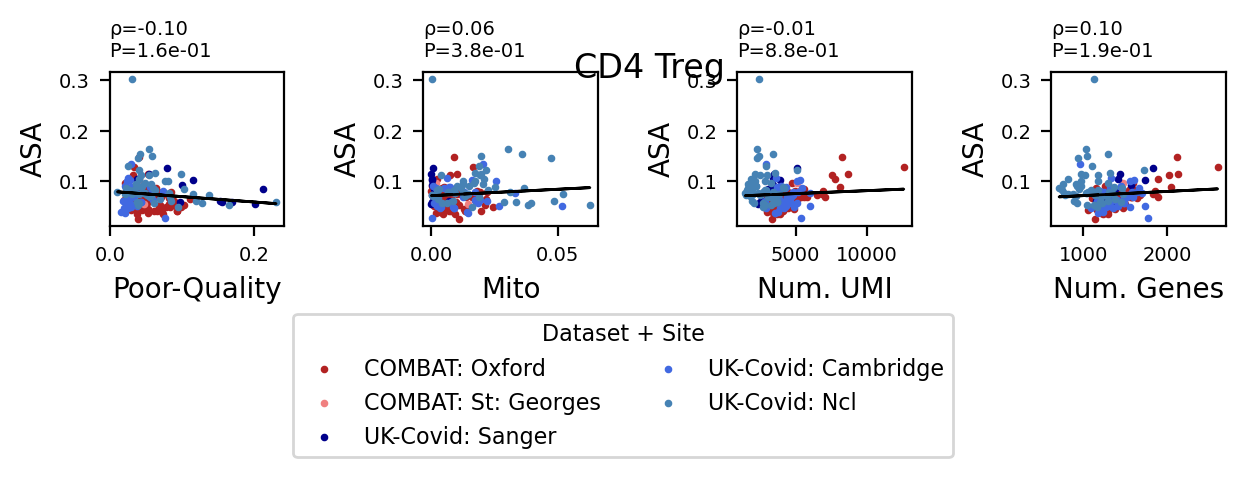

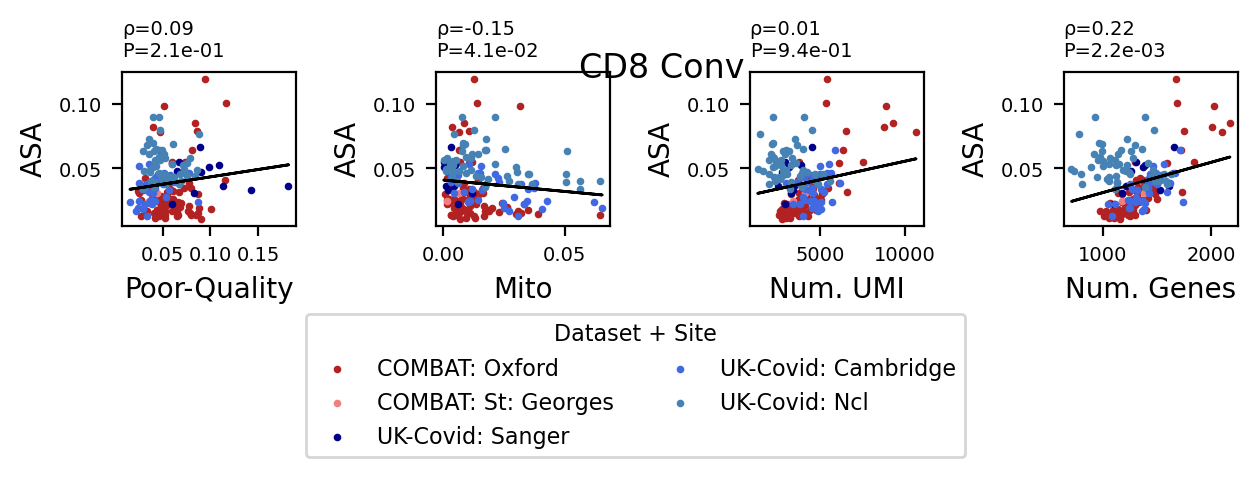

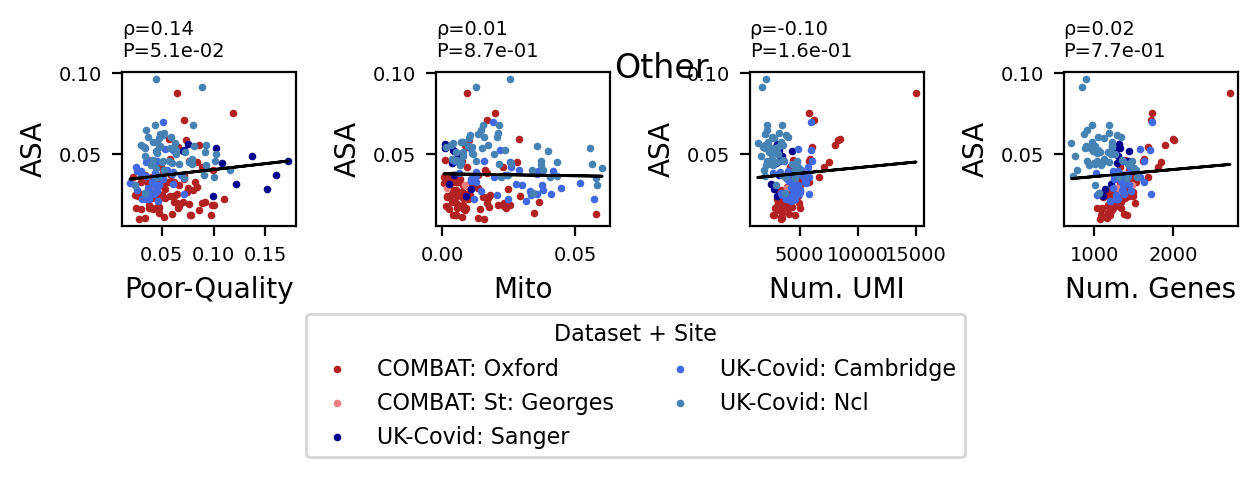

In [135]:
dat_all = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'Gating_Class', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()

for gate in ['All'] + list(dat_all['Gating_Class'].unique()):
    if gate =='All':
        dat = pd.DataFrame(multi_comp.loc[multi_comp['Pheno'].dropna().index ,: ].groupby(['Dataset', 'patient', 'Pheno', 'Site', 'Dataset_Site'])[['ASA', 'nUMI', 'ngenes'] + list(usage.columns)].mean()).reset_index()
    else:
        dat = dat_all[(dat_all['Gating_Class']==gate)]
    
    fig, axes = plt.subplots(dpi = 200, figsize = (9/5*len(test_vars), 1.), 
                             ncols = len(test_vars), 
                             # nrows = 2, 
                             gridspec_kw = {'wspace' : 0.8})

    for n, g in enumerate(test_vars):
        ax = axes[n]
        
    
        for site in dat['Dataset_Site'].unique():
            ind = dat[dat['Dataset_Site']==site].index
            y = dat.loc[ind, 'ASA']
            x = dat.loc[ind, g]
            ax.scatter(x, y, s = 3, label = site, color = site_cmap[site])
            
        y_all = dat.loc[:, 'ASA']
        x_all = dat.loc[:, g]
        r_p, p_p = spearmanr(x_all, y_all)


        # fitting a linear regression line
        m, b = np.polyfit(x_all, y_all, 1)
        ax.plot(x_all, m*x_all + b, linewidth = 1, color = 'black')   
        
        ax.text(x = 0, y = 1.1, transform=ax.transAxes, s = f'ρ={r_p:.2f}\nP={p_p:.1e}',
               fontsize = tick_fontsize-1)

        ax.tick_params('both', labelsize = tick_fontsize -1)
        ax.set_ylabel('ASA', fontsize = label_fontsize)
        ax.set_xlabel(varname_map[g], fontsize = label_fontsize)

        if g in cc_cgeps:
            ax.set_xticklabels([f'{float(tick.get_text().replace("−", "-")):.0E}' 
                                for tick in ax.get_yticklabels()])
            # ax.set_xlabel(ax.get_xlabel(), labelpad=-1)

    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=[x.replace('_', ': ') for x in labels],
             bbox_to_anchor=(-.5, -.5), title = 'Dataset + Site', title_fontsize = tick_fontsize,
              fontsize = tick_fontsize, ncols = 2)
            
    plt.suptitle(gate)
# plt.savefig(os.path.join(figdir, 'Revision_Activation+GEPScatterplots_Covid.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Revision_Activation+GEPScatterplots_Covid.pdf'), bbox_inches="tight")
plt.show()
